In [1]:
import pandas as pd

### Distributions of generated data

In [2]:
df = pd.read_csv("../data/event_log_feat.csv")
print(df.shape)
df.head()

(5, 93)


,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_lempel_ziv,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7
0,100_64_0_0_0.5_0.5_0_0,100,100,1.000000,12,479,88.510000,55.0,42,98.720463,...,3.912,-0.005,3.134,0.280,4.255,5.376,5.376,4.020,3.471,3.128
1,100_64_0_0_0.5_0.5_0_1,100,100,1.000000,8,193,42.880000,31.0,9,38.637619,...,3.475,-0.011,2.669,1.800,3.626,4.584,4.584,3.877,3.352,3.018
2,100_64_0_0_0.5_0_0.5_0,100,100,1.000000,4,30,15.990000,16.5,18,7.132314,...,4.653,5.634,5.634,5.634,5.634,5.634,5.634,4.075,3.532,3.189
3,100_64_0_0_0.5_0_0.5_1,55,41,0.745455,1,20,5.927273,5.0,1,4.789589,...,4.046,5.274,5.274,5.274,5.274,5.274,5.274,3.193,2.678,2.361
4,100_64_0_0_0_0.5_0.5_0,52,37,0.711538,1,21,5.076923,3.0,3,4.726546,...,2.803,-0.133,4.016,1.273,4.016,4.016,4.016,2.908,2.443,2.168


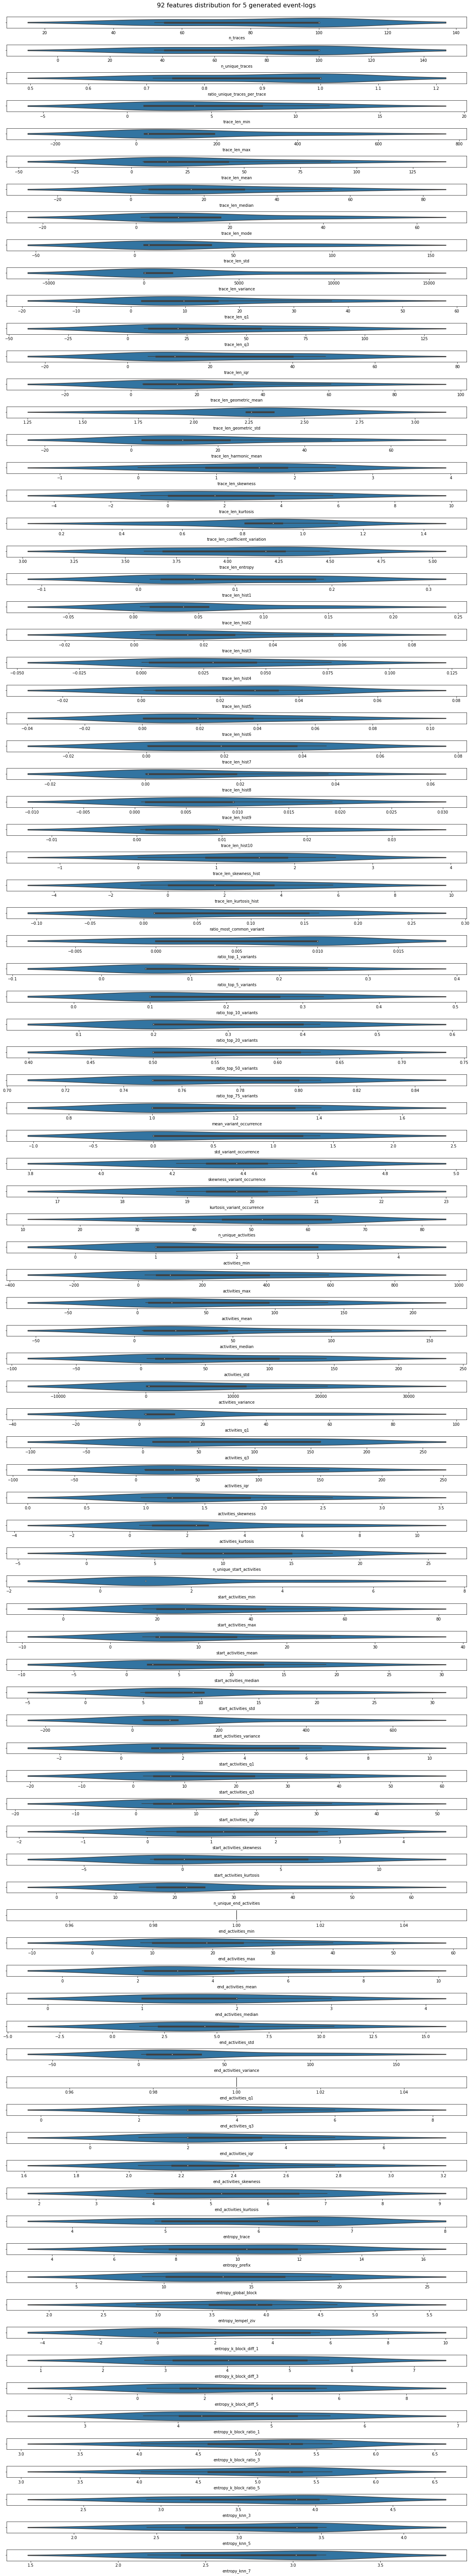

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns[1:]
df1=df.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(df1.columns),1, figsize=(17,len(df1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=df1, x=df1[df1.columns[i]], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(df)} generated event-logs", fontsize=16, y=1)
fig.tight_layout()

In [5]:
output_path=f"../output/feature_violinplots_{len(columns)}_{len(df1)}.jpg"
fig.savefig(output_path)
print("Saved in", output_path)

Saved in ../output/feature_violinplots_92_5.jpg


### Distributions of real data

In [51]:
dmf = pd.read_csv("../data/real_event_logs.csv", index_col=None)
dmf = dmf.drop(['Unnamed: 0'], axis=1)
print(dmf.shape)
dmf.head()

(23, 94)


,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7,Log Nature
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,7.105,7.105,7.105,7.105,7.105,7.105,5.545,5.039,4.721,Real
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,-0.010,1.855,0.511,1.403,3.572,2.001,7.849,7.371,7.067,Real
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.672,2.966,0.804,1.484,2.966,2.966,3.260,2.845,2.584,Real
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,-0.007,6.780,6.780,6.780,6.780,6.780,5.701,5.212,4.900,Real
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,-0.041,1.530,0.840,0.620,3.244,1.913,7.333,6.882,6.601,Real


23 ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']


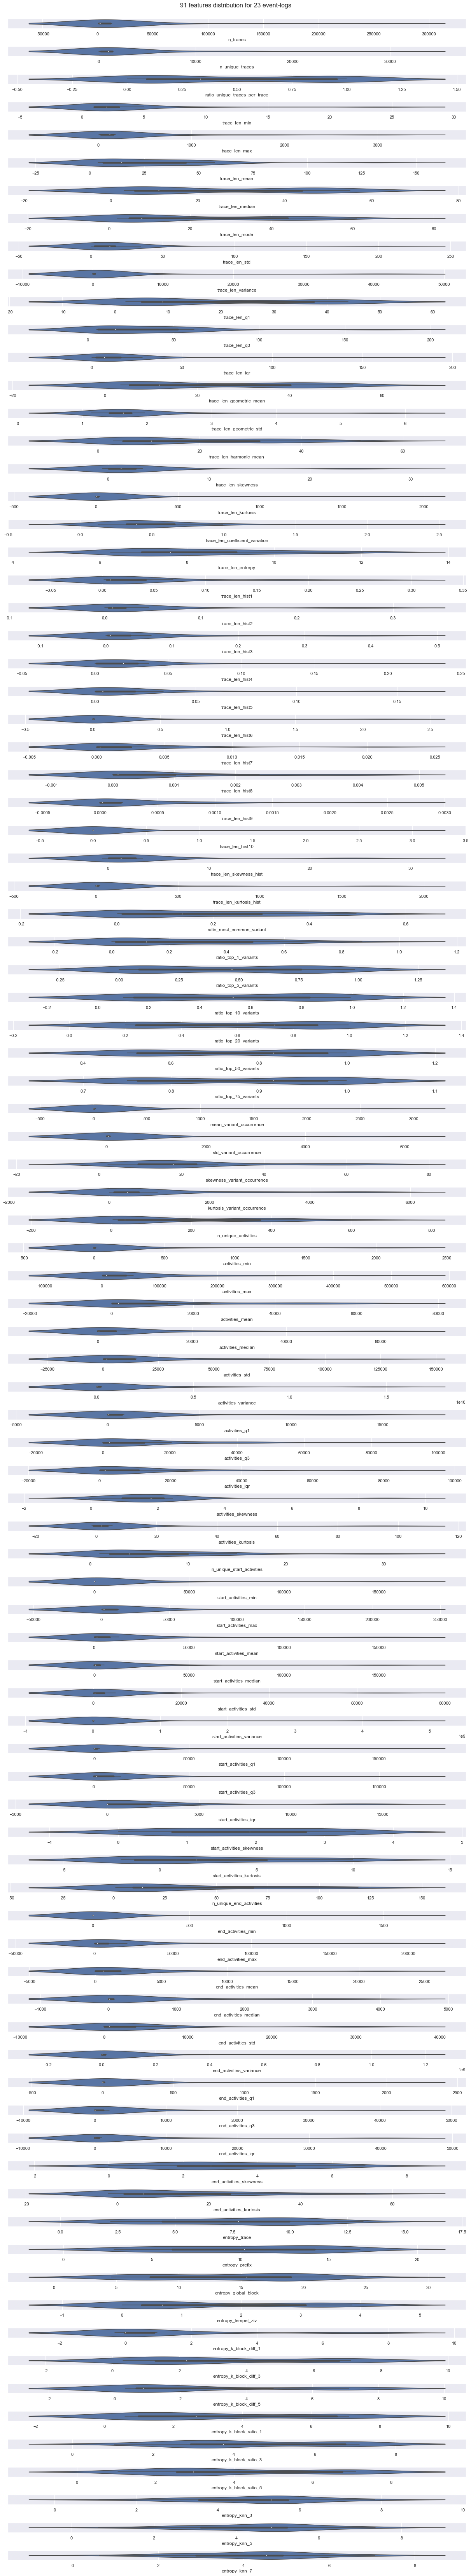

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

print(len(dmf), dmf['log'].unique())

columns = dmf.columns[3:]
dmf1=dmf.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=dmf, x=dmf1.columns[i], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(dmf)} event-logs", fontsize=16, y=1)
fig.tight_layout()

In [7]:
output_path=f"../output/feature_violinplots_{len(columns)}_{len(dmf)}.jpg"
fig.savefig(output_path)
print("Saved in", output_path)

Saved in ../output/feature_violinplots_93_1119.jpg


### Comparison of distributions for real and generated data

In [30]:
rdf = dmf[dmf['Log Nature']=='Real']
print(len(rdf), rdf['log'].unique())

bdf = pd.concat([dmf, df])
bdf['Log Nature'] = bdf['Log Nature'].fillna('Generated')
print(len(bdf), 'logs', len(bdf.columns),'columns', bdf['log'].unique())
bdf

23 ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']
28 logs 94 columns ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017'
 '100_64_

,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_k_block_diff_1,entropy_k_block_diff_3,entropy_k_block_diff_5,entropy_k_block_ratio_1,entropy_k_block_ratio_3,entropy_k_block_ratio_5,entropy_knn_3,entropy_knn_5,entropy_knn_7,Log Nature
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,7.105,7.105,7.105,7.105,7.105,7.105,5.545,5.039,4.721,Real
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,-0.010,1.855,0.511,1.403,3.572,2.001,7.849,7.371,7.067,Real
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.672,2.966,0.804,1.484,2.966,2.966,3.260,2.845,2.584,Real
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,-0.007,6.780,6.780,6.780,6.780,6.780,5.701,5.212,4.900,Real
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,-0.041,1.530,0.840,0.620,3.244,1.913,7.333,6.882,6.601,Real
5,RequestForPayment,6886,89,0.012925,1,20,5.343596,5.0,5,1.467384,...,-0.328,0.323,0.323,0.587,2.883,2.883,2.921,2.574,2.312,Real
6,PrepaidTravelCost,2099,202,0.096236,1,21,8.692711,8.0,8,2.253873,...,-0.092,3.734,0.815,3.734,3.734,3.734,3.661,3.258,2.987,Real
7,DomesticDeclarations,10500,99,0.009429,1,24,5.374952,5.0,5,1.486345,...,-0.295,0.325,0.325,0.612,2.827,2.827,2.942,2.576,2.315,Real
8,BPIC15_4,1053,1049,0.996201,1,116,44.912631,44.0,42,14.947644,...,-0.002,6.824,6.824,6.824,6.824,6.824,5.539,5.040,4.729,Real
9,BPI_Challenge_2012,13087,4366,0.333614,3,175,20.035149,11.0,3,19.943559,...,0.000,1.315,0.443,1.034,3.688,2.502,6.071,5.616,5.335,Real


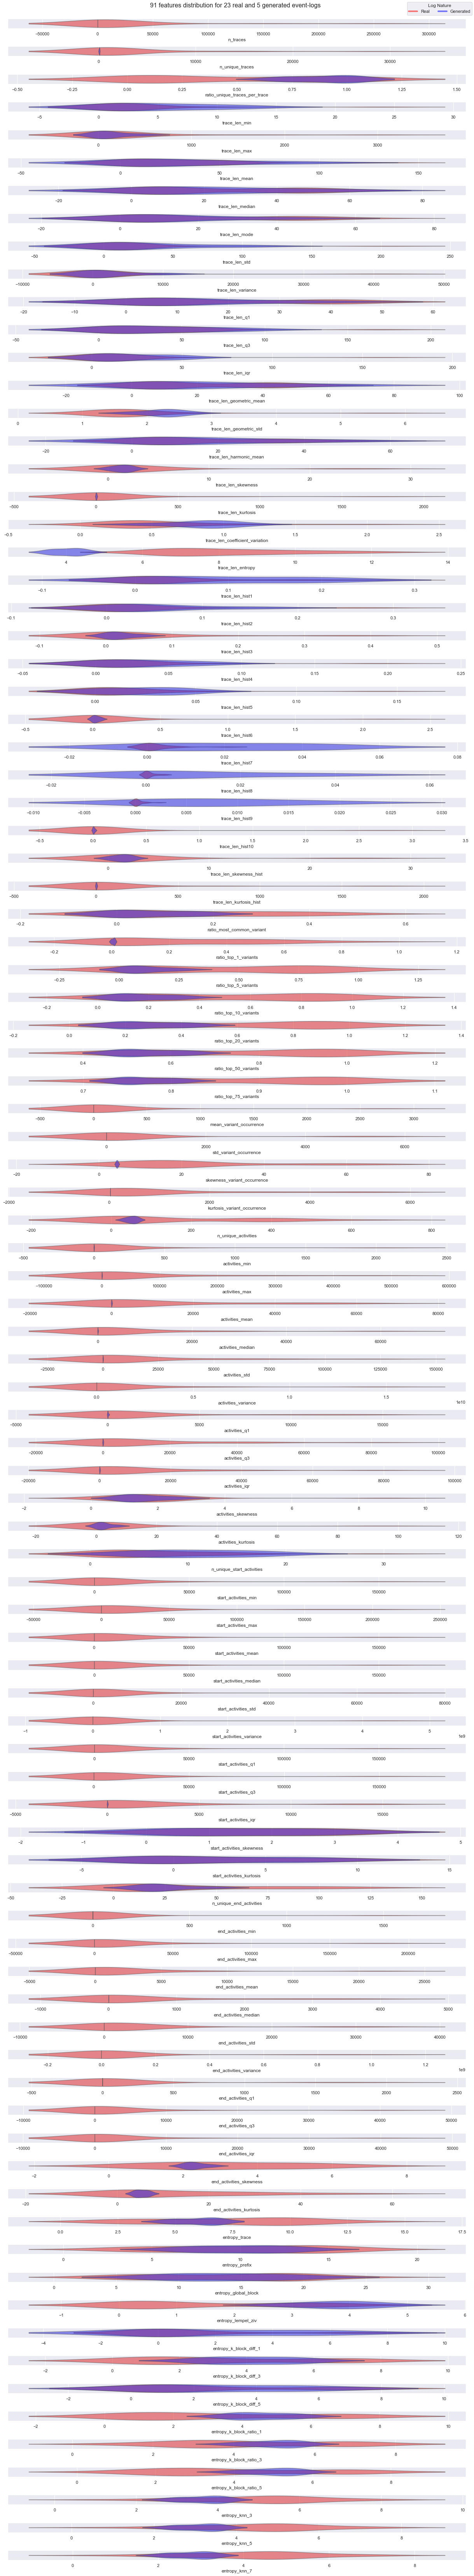

In [31]:
from matplotlib.lines import Line2D

alpha = 0.5
columns = bdf.columns[3:]
dmf1=bdf.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
#nature_types = set(['Generated', 'Real'])#set(bdf['Log Nature'].unique())
nature_types = set(bdf['Log Nature'].unique())
color = ["red", "blue", 'orange']
for i, ax in enumerate(axes):
    for j, nature in enumerate(nature_types):
        sns.violinplot(data=bdf[bdf['Log Nature']==nature], x=dmf1.columns[i], inner=None, palette=[color[j]], ax=ax)
    for violin in ax.collections:
        violin.set_alpha(alpha)

    custom_lines = [
        Line2D([0], [0], color=color[nature], lw=4, alpha=alpha) 
        for nature in [0,1,2]
    ]
    #ax.legend(custom_lines, bdf['Log Nature'].unique(), title= "Log Nature")
fig.legend(custom_lines, nature_types, title= "Log Nature", loc='upper right', ncol=len(nature_types))
fig.suptitle(f"{len(columns)} features distribution for {len(rdf)} real and {len(df)} generated event-logs", fontsize=16, y=1)
fig.tight_layout()

In [ ]:
output_path = f"../output/feature_violinplots_{len(columns)}_{len(bdf)}_{len(nature_types)}.jpg"
fig.savefig(output_path)
print("Saved in", output_path)

In [52]:
import numpy as np
from sklearn.impute import SimpleImputer
df= bdf.drop(['Log Nature'], axis=1)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df.drop(['log'], axis=1))
imp_df = imp_mean.transform(df.drop(['log'], axis=1))
imp_df = pd.DataFrame(imp_df, columns = df.columns[1:])
print("Before:", len(df.loc[:, df.isna().any()].columns), "columns in", len(df.loc[:, df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

Before: 6 columns in 28 rows
After: 0


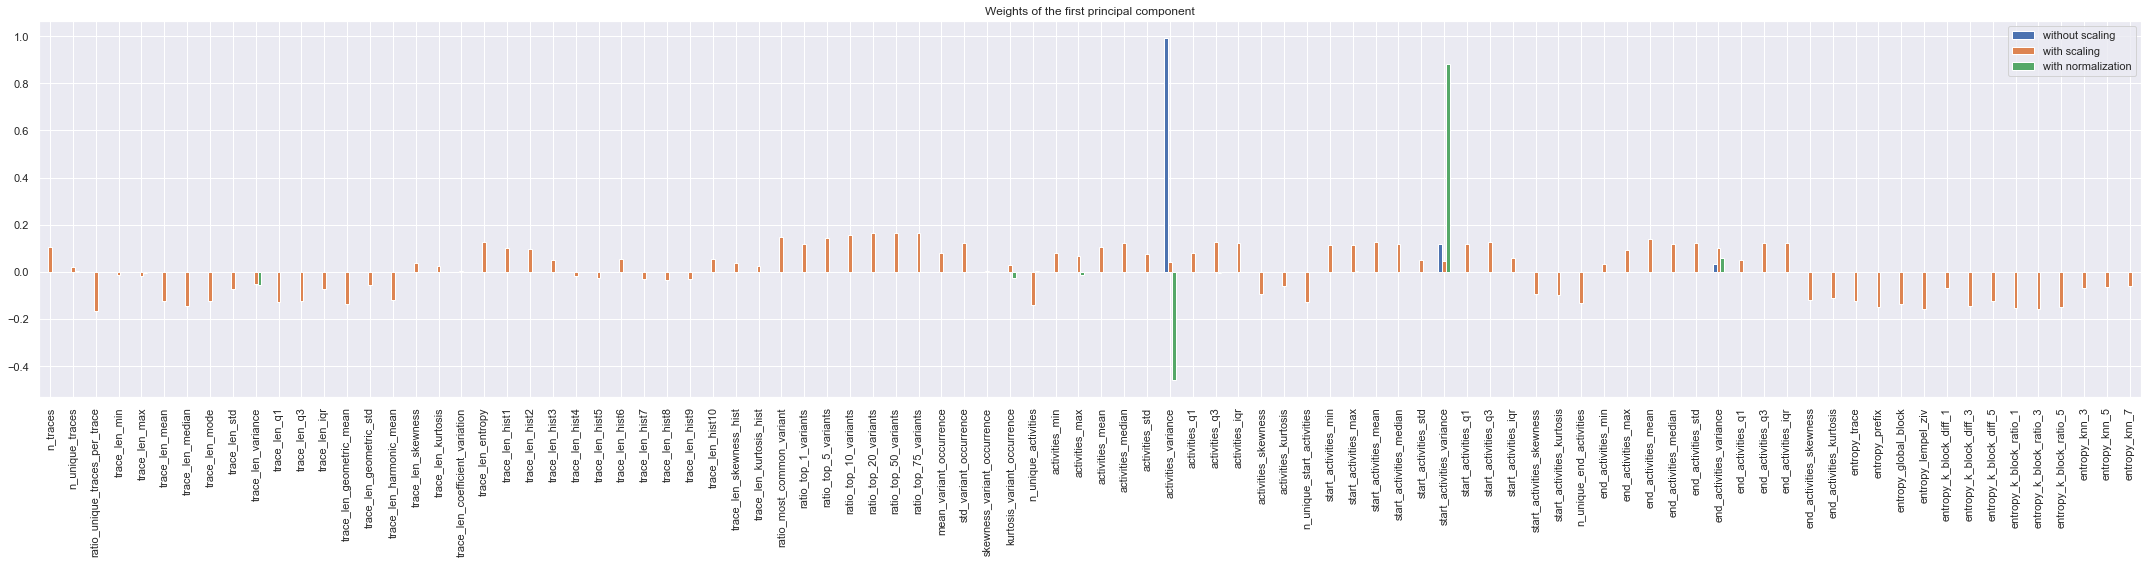

In [53]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = imp_df
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()



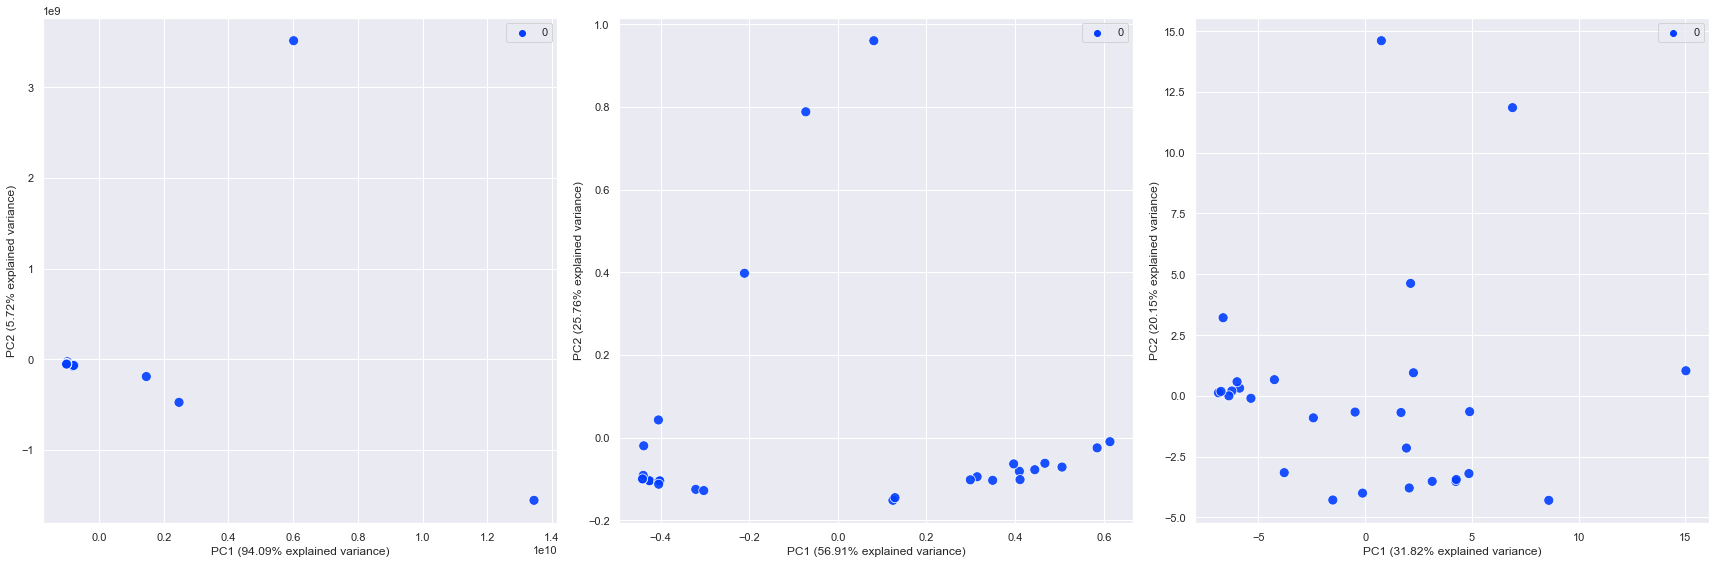

In [54]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

X_new = pca.fit_transform(X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

In [55]:
def plot_selected_logs(df_original, df_pca_reduced, selected):
    df_ = df_original.copy()
    df_.insert(1, "selected", "no")    
    df_.iloc[sorted(selected), 1] = "yes"
    df_pca_reduced["selected"] = df_["selected"]

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(
        ax=ax,
        data=df_pca_reduced.sort_values(["selected"]),
        x="PC1",
        y="PC2",
        hue="Log Nature",
        hue_order=["Real", "Generated"],
        style="selected",
        palette="bright",
        alpha=1,
        s=100
    )
    ax.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
    ax.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
    plt.tight_layout()

In [ ]:
plot_selected_logs(df, df_pca, sampled_instances)